In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, cross_val_score, KFold, cross_val_predict
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             roc_curve, auc, precision_recall_curve, confusion_matrix,
                             classification_report, average_precision_score)
from sklearn.preprocessing import LabelEncoder
from itertools import cycle


In [3]:
df = pd.read_csv('/content/drive/MyDrive/merged_V2.csv')

In [4]:
# sma 적용
coordinate_columns = [col for col in df.columns if '_x' in col or '_y' in col]

#sma 계산
def apply_sma(df, window_size):
    return df.rolling(window=window_size, min_periods=1).mean()

window_size = 10

for col in coordinate_columns:
    df[f"{col}_SMA"] = apply_sma(df[col], window_size)

In [5]:
df = df.drop(['image_filename', 'Nose_x', 'Nose_y', 'LEye_x', 'LEye_y', 'REye_x', 'REye_y', 'LEar_x', 'LEar_y', 'REar_x', 'REar_y', 'LShoulder_x', 'LShoulder_y', 'RShoulder_x', 'RShoulder_y', 'LElbow_x', 'LElbow_y', 'RElbow_x', 'RElbow_y', 'LWrist_x', 'LWrist_y', 'RWrist_x', 'RWrist_y', 'LHip_x', 'LHip_y', 'RHip_x', 'RHip_y', 'LKnee_x', 'LKnee_y', 'RKnee_x', 'RKnee_y', 'LAnkle_x', 'LAnkle_y', 'RAnkle_x', 'RAnkle_y', 'Head_x', 'Head_y', 'Neck_x', 'Neck_y', 'Hip_x', 'Hip_y', 'LBigToe_x', 'LBigToe_y', 'RBigToe_x', 'RBigToe_y', 'LSmallToe_x', 'LSmallToe_y', 'RSmallToe_x', 'RSmallToe_y', 'LHeel_x', 'LHeel_y', 'RHeel_x', 'RHeel_y', 'gender', 'level','path'], axis=1)

In [6]:
encoder = LabelEncoder()
encoder.fit(df['label'])

df["label"] = encoder.transform(df['label'])
df
# 0 = jump, 1 = spin, 2 = step

,label,Nose_x_SMA,Nose_y_SMA,LEye_x_SMA,LEye_y_SMA,REye_x_SMA,REye_y_SMA,LEar_x_SMA,LEar_y_SMA,REar_x_SMA,...,RBigToe_x_SMA,RBigToe_y_SMA,LSmallToe_x_SMA,LSmallToe_y_SMA,RSmallToe_x_SMA,RSmallToe_y_SMA,LHeel_x_SMA,LHeel_y_SMA,RHeel_x_SMA,RHeel_y_SMA
0,0,1368.317139,245.318161,1375.947510,242.774719,1368.317139,240.231262,1388.664673,245.318161,1386.121338,...,1355.599976,466.598053,1360.686768,466.598053,1355.599976,464.054596,1383.577881,456.424255,1386.121338,456.424255
1,0,1367.848328,245.637512,1375.530090,241.788086,1367.848328,240.516357,1388.332947,245.637512,1385.772400,...,1355.045471,465.829834,1360.166626,467.118683,1355.045471,463.269241,1384.500671,456.876373,1385.772400,456.876373
2,0,1367.176839,246.625412,1374.855062,242.354441,1367.176839,241.506622,1387.652018,245.773066,1385.092611,...,1355.232259,465.869395,1359.498698,466.728628,1355.232259,463.309987,1383.392456,457.343394,1386.797323,456.491048
3,0,1366.639343,246.892811,1374.332092,242.400204,1366.639343,241.764339,1387.153259,246.253551,1383.944305,...,1355.102173,466.124359,1359.591370,466.768784,1355.102173,463.560120,1382.669189,457.795792,1387.156921,456.511848
4,0,1365.729785,246.999573,1373.428809,242.375607,1366.244727,241.351978,1386.260449,246.488165,1383.178345,...,1354.955225,466.154700,1359.576465,466.670239,1354.955225,463.588373,1383.703076,457.947028,1387.293262,456.404932
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10196118,2,585.248431,483.925378,594.100562,473.431409,578.557373,474.293182,616.850745,471.763293,575.217816,...,603.392633,837.856982,635.340308,841.233405,594.535266,831.544739,653.015619,809.651733,621.897852,808.382910
10196119,2,579.594904,487.007431,588.951056,476.442865,573.266675,477.304639,611.479602,474.739450,569.891821,...,597.446875,843.541235,629.676929,847.784515,588.518903,837.158398,647.528729,815.522327,616.562006,813.386652
10196120,2,573.981891,489.909622,583.830206,479.686374,567.593317,480.548148,606.509607,477.952789,564.188293,...,591.522711,849.007941,623.994135,854.145044,582.534393,842.594928,642.398444,821.641492,611.220526,818.642157
10196121,2,568.586273,493.494623,578.478711,483.205191,562.153571,484.494000,601.695453,481.044571,558.726489,...,585.361267,854.468140,618.009180,860.908405,576.328827,848.033063,636.928772,828.228363,606.001398,824.374957


In [7]:
import numpy as np

def add_adversarial_noise_optimized(df, epsilon=2.0):
    # 필요한 컬럼 리스트
    sma_columns = [col for col in df.columns if col.endswith("_SMA") and ('_x' in col or '_y' in col)]
    # 원본 복사는 최소한으로 (필요한 부분만 복사)
    df_adv = df.copy(deep=False)  # 얕은 복사: 메모리 사용량이 줄어듦 (단, 내부 데이터가 수정되면 원본에도 영향이 있을 수 있음)

    # 모든 SMA 컬럼에 대해 한 번에 noise 행렬 생성 후 적용
    noise = np.random.uniform(-epsilon, epsilon, size=(df_adv.shape[0], len(sma_columns)))
    df_adv.loc[:, sma_columns] = df_adv.loc[:, sma_columns] + noise
    return df_adv

# 최적화된 함수 사용
df_adv = add_adversarial_noise_optimized(df, epsilon=2.0)

In [8]:
df.head()

,label,Nose_x_SMA,Nose_y_SMA,LEye_x_SMA,LEye_y_SMA,REye_x_SMA,REye_y_SMA,LEar_x_SMA,LEar_y_SMA,REar_x_SMA,...,RBigToe_x_SMA,RBigToe_y_SMA,LSmallToe_x_SMA,LSmallToe_y_SMA,RSmallToe_x_SMA,RSmallToe_y_SMA,LHeel_x_SMA,LHeel_y_SMA,RHeel_x_SMA,RHeel_y_SMA
0,0,1366.526089,244.788033,1374.187028,244.550118,1370.271519,241.544405,1389.052769,247.081169,1387.217776,...,1357.252371,465.842676,1361.664847,464.950220,1354.622248,463.105448,1382.840257,457.841466,1385.781478,454.828742
1,0,1369.416528,247.187539,1374.493378,242.567023,1369.480502,241.539289,1386.427504,247.602430,1386.575659,...,1353.665756,464.229773,1360.345573,468.842248,1354.452494,465.094561,1384.806612,455.243541,1385.562464,457.470538
2,0,1368.558368,246.579085,1375.695940,243.275505,1367.051387,242.259737,1389.231018,243.984717,1384.640865,...,1353.465247,465.177886,1360.847126,467.094575,1353.307579,465.306783,1384.166367,457.200164,1386.099116,455.686318
3,0,1366.972853,247.989790,1375.142455,243.485567,1365.051958,240.811875,1388.001207,246.997608,1383.527508,...,1353.186713,467.751911,1360.571975,468.190893,1355.067351,463.172388,1383.434296,456.590018,1387.177562,457.073582
4,0,1365.024924,245.530572,1372.457484,244.078479,1365.318734,241.638618,1384.383987,246.992924,1385.156631,...,1355.289407,467.376196,1359.795520,467.488590,1355.410715,463.117519,1384.913134,456.261702,1388.242803,454.669699


In [9]:
X = df.drop(['label'], axis=1)
Y = df['label']

print(X.shape)
print(Y.shape)

(10196123, 52)
(10196123,)


In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X,Y, test_size=0.2, random_state=42, stratify = Y
)
X_train, X_val, Y_train, Y_val = train_test_split(
    X_train, Y_train, test_size=0.2, random_state=42, stratify=Y_train
)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)
print(X_val.shape)
print(Y_val.shape)

(6525518, 52)
(2039225, 52)
(6525518,)
(2039225,)
(1631380, 52)
(1631380,)


In [11]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import StratifiedKFold
import numpy as np

n_splits = 5
kf = StratifiedKFold(n_splits=n_splits, shuffle=False)

X_tensor = torch.tensor(X.values, dtype=torch.float32)
Y_tensor = torch.tensor(Y.values, dtype=torch.long)

print(f"Total dataset size: {X_tensor.shape}")
print(f"Using {n_splits}-fold cross-validation")

Total dataset size: torch.Size([10196123, 52])
Using 5-fold cross-validation


In [12]:
class CustomDataset(Dataset):
    def __init__(self, X, Y):
        self.X = X
        self.Y = Y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.Y[idx]

In [13]:
def dataloader(X_train, Y_train, X_val, Y_val, batch_size=64):
    train_dataset = CustomDataset(X_train, Y_train)
    val_dataset = CustomDataset(X_val, Y_val)

    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

    return train_loader, val_loader


In [14]:
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out, _ = self.lstm(x.unsqueeze(1))  # (batch, seq_len=1, features)
        out = self.fc(out[:, -1, :])  # 마지막 타임스텝의 출력 사용
        return out


In [15]:
class TransformerModel(nn.Module):
    def __init__(self, input_size, num_classes, num_heads=4, hidden_dim=128, num_layers=2):
        super(TransformerModel, self).__init__()
        self.encoder_layer = nn.TransformerEncoderLayer(d_model=input_size, nhead=num_heads, dim_feedforward=hidden_dim)
        self.transformer_encoder = nn.TransformerEncoder(self.encoder_layer, num_layers=num_layers)
        self.fc = nn.Linear(input_size, num_classes)

    def forward(self, x):
        x = self.transformer_encoder(x.unsqueeze(1))  # (batch, seq_len=1, features)
        x = self.fc(x[:, -1, :])  # 마지막 타임스텝의 출력 사용
        return x


In [16]:
def train_model(model, train_loader, val_loader, epochs=10, learning_rate=1e-4, device="cuda"):
    model = model.to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    for epoch in range(epochs):
        model.train()
        train_loss = 0
        correct, total = 0, 0

        # Training loop
        for X_batch, Y_batch in train_loader:
            X_batch, Y_batch = X_batch.to(device), Y_batch.to(device)

            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, Y_batch)
            loss.backward()
            optimizer.step()

            train_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == Y_batch).sum().item()
            total += Y_batch.size(0)

        train_acc = correct / total

        # Validation loop
        model.eval()  # 평가 모드 전환
        val_loss = 0
        correct_val, total_val = 0, 0
        with torch.no_grad():
            for X_batch, Y_batch in val_loader:
                X_batch, Y_batch = X_batch.to(device), Y_batch.to(device)
                outputs = model(X_batch)
                loss = criterion(outputs, Y_batch)
                val_loss += loss.item()
                _, predicted = torch.max(outputs, 1)
                correct_val += (predicted == Y_batch).sum().item()
                total_val += Y_batch.size(0)

        val_acc = correct_val / total_val

        print(f"Epoch {epoch+1}/{epochs}, "
              f"Train Loss: {train_loss/len(train_loader):.4f}, Train Acc: {train_acc:.4f}, "
              f"Val Loss: {val_loss/len(val_loader):.4f}, Val Acc: {val_acc:.4f}")

    return model


def get_predictions(model, test_loader, device="cuda"):
    model.eval()
    all_probs = []
    with torch.no_grad():
        for X_batch, _ in test_loader:
            X_batch = X_batch.to(device)
            outputs = model(X_batch)
            probs = torch.softmax(outputs, dim=1)  # 확률로 변환
            all_probs.append(probs.cpu().numpy())
    return np.concatenate(all_probs, axis=0)




In [17]:
# Test Set을 NumPy 배열로 변환 후 PyTorch Tensor로 변환
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
Y_test_tensor = torch.tensor(Y_test.values, dtype=torch.long)

# Test Dataset & DataLoader 생성
test_dataset = CustomDataset(X_test_tensor, Y_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

print(f"Test set size: {len(test_dataset)} samples")

Test set size: 2039225 samples


In [18]:
device = "cuda" if torch.cuda.is_available() else "cpu"
num_classes = len(np.unique(Y))  # 클래스 개수
input_size = X.shape[1]  # 입력 특성 개수

# 테스트셋 샘플 수와 클래스 수를 이용해 예측 확률 누적 배열 생성
ensemble_lstm_probs = np.zeros((len(test_dataset), num_classes))
ensemble_transformer_probs = np.zeros((len(test_dataset), num_classes))


# K-Fold 학습 및 각 fold 모델의 예측값 누적
for fold, (train_idx, val_idx) in enumerate(kf.split(X_tensor, Y_tensor)):
    print(f" Fold {fold+1}/{n_splits}")

    # 데이터 분할
    X_train_fold, Y_train_fold = X_tensor[train_idx], Y_tensor[train_idx]
    X_val_fold, Y_val_fold = X_tensor[val_idx], Y_tensor[val_idx]

    train_loader, val_loader = dataloader(X_train_fold, Y_train_fold, X_val_fold, Y_val_fold, batch_size=32)

    # LSTM 모델 학습
    lstm_model = LSTMModel(input_size=input_size, hidden_size=64, num_layers=2, num_classes=num_classes)
    print(" Training LSTM Model")
    trained_lstm = train_model(lstm_model, train_loader, val_loader, epochs=7, device=device)

    # Transformer 모델 학습
    transformer_model = TransformerModel(input_size=input_size, num_classes=num_classes, num_heads=4, hidden_dim=128, num_layers=2)
    print(" Training Transformer Model")
    trained_transformer = train_model(transformer_model, train_loader, val_loader, epochs=7, device=device)

    # 각 fold의 모델로 테스트셋 예측 (확률)
    lstm_fold_probs = get_predictions(trained_lstm, test_loader, device=device)
    transformer_fold_probs = get_predictions(trained_transformer, test_loader, device=device)

    # 각 fold의 예측값을 누적 (앙상블을 위해)
    ensemble_lstm_probs += lstm_fold_probs
    ensemble_transformer_probs += transformer_fold_probs



 Fold 1/5
 Training LSTM Model
Epoch 1/7, Train Loss: 1.0180, Train Acc: 0.4842, Val Loss: 1.0217, Val Acc: 0.4958
Epoch 2/7, Train Loss: 1.0143, Train Acc: 0.4866, Val Loss: 0.9991, Val Acc: 0.5024
Epoch 3/7, Train Loss: 1.0101, Train Acc: 0.4913, Val Loss: 1.0051, Val Acc: 0.4721
Epoch 4/7, Train Loss: 1.0078, Train Acc: 0.4938, Val Loss: 0.9946, Val Acc: 0.5093
Epoch 5/7, Train Loss: 1.0053, Train Acc: 0.4967, Val Loss: 1.0069, Val Acc: 0.4766
Epoch 6/7, Train Loss: 1.0049, Train Acc: 0.4962, Val Loss: 1.0079, Val Acc: 0.4965
Epoch 7/7, Train Loss: 1.0024, Train Acc: 0.5004, Val Loss: 1.0084, Val Acc: 0.4758
 Training Transformer Model


/usr/local/lib/python3.11/dist-packages/torch/nn/modules/transformer.py:385: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(


Epoch 1/7, Train Loss: 0.8698, Train Acc: 0.5937, Val Loss: 0.9266, Val Acc: 0.5771
Epoch 2/7, Train Loss: 0.7611, Train Acc: 0.6570, Val Loss: 0.9234, Val Acc: 0.5783
Epoch 3/7, Train Loss: 0.7132, Train Acc: 0.6830, Val Loss: 0.9181, Val Acc: 0.5659
Epoch 4/7, Train Loss: 0.6836, Train Acc: 0.6985, Val Loss: 0.8790, Val Acc: 0.5897
Epoch 5/7, Train Loss: 0.6622, Train Acc: 0.7094, Val Loss: 0.9217, Val Acc: 0.5783
Epoch 6/7, Train Loss: 0.6453, Train Acc: 0.7179, Val Loss: 0.9620, Val Acc: 0.5631
Epoch 7/7, Train Loss: 0.6407, Train Acc: 0.7200, Val Loss: 0.9388, Val Acc: 0.5691
 Fold 2/5
 Training LSTM Model
Epoch 1/7, Train Loss: 1.0152, Train Acc: 0.4808, Val Loss: 1.0191, Val Acc: 0.4919
Epoch 2/7, Train Loss: 1.0111, Train Acc: 0.4783, Val Loss: 1.0240, Val Acc: 0.4424
Epoch 3/7, Train Loss: 1.0095, Train Acc: 0.4781, Val Loss: 1.0186, Val Acc: 0.4774
Epoch 4/7, Train Loss: 1.0085, Train Acc: 0.4811, Val Loss: 1.0224, Val Acc: 0.5044
Epoch 5/7, Train Loss: 1.0079, Train Acc: 0.4

In [19]:
# 각 모델의 예측 확률을 평균 내어 최종 예측값 도출
ensemble_lstm_probs /= n_splits
ensemble_transformer_probs /= n_splits

# 예측 확률에서 최종 클래스 라벨 도출 (argmax)
ensemble_lstm_preds = np.argmax(ensemble_lstm_probs, axis=1)
ensemble_transformer_preds = np.argmax(ensemble_transformer_probs, axis=1)

from sklearn.metrics import classification_report, confusion_matrix

print("=== LSTM Ensemble Evaluation ===")
print("Classification Report:")
print(classification_report(Y_test.values, ensemble_lstm_preds))
print("Confusion Matrix:")
print(confusion_matrix(Y_test.values, ensemble_lstm_preds))

print("\n=== Transformer Ensemble Evaluation ===")
print("Classification Report:")
print(classification_report(Y_test.values, ensemble_transformer_preds))
print("Confusion Matrix:")
print(confusion_matrix(Y_test.values, ensemble_transformer_preds))


=== LSTM Ensemble Evaluation ===
Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.68      0.63    921106
           1       0.43      0.62      0.50    656960
           2       1.00      0.00      0.00    461159

    accuracy                           0.51   2039225
   macro avg       0.67      0.43      0.38   2039225
weighted avg       0.62      0.51      0.45   2039225

Confusion Matrix:
[[629132 291974      0]
 [251164 405796      0]
 [207338 253819      2]]

=== Transformer Ensemble Evaluation ===
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.84      0.80    921106
           1       0.76      0.70      0.73    656960
           2       0.71      0.64      0.68    461159

    accuracy                           0.75   2039225
   macro avg       0.74      0.73      0.73   2039225
weighted avg       0.75      0.75      0.75   2039225

Confusion Matrix:
[[771341 

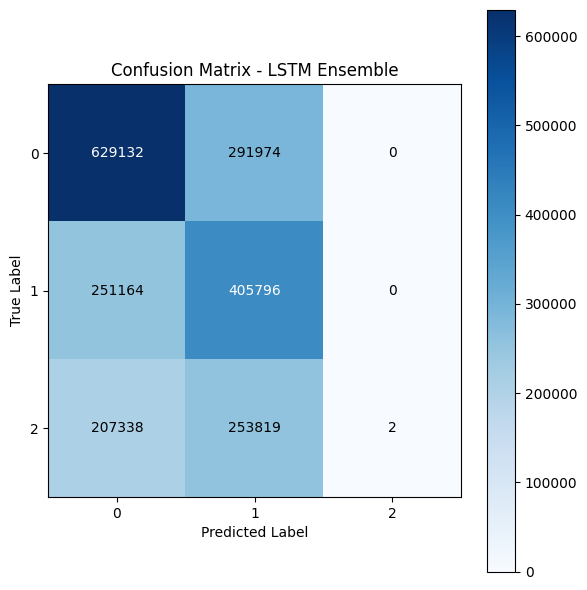

In [20]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

# 혼동 행렬 계산
cm = confusion_matrix(Y_test.values, ensemble_lstm_preds)

plt.figure(figsize=(6, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix - LSTM Ensemble")
plt.colorbar()

tick_marks = np.arange(num_classes)
plt.xticks(tick_marks, tick_marks)
plt.yticks(tick_marks, tick_marks)

# 셀 값 표시
fmt = 'd'
thresh = cm.max() / 2.0
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], fmt),
                 ha="center", va="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.tight_layout()
plt.show()


In [21]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
from sklearn.preprocessing import label_binarize

# 다중 클래스의 경우 True 라벨을 바이너리화
classes = np.unique(Y_test.values)
n_classes = len(classes)
Y_test_bin = label_binarize(Y_test.values, classes=classes)

fpr = dict()
tpr = dict()
roc_auc = dict()
precision = dict()
recall = dict()
avg_precision = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_test_bin[:, i], ensemble_lstm_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    precision[i], recall[i], _ = precision_recall_curve(Y_test_bin[:, i], ensemble_lstm_probs[:, i])
    avg_precision[i] = average_precision_score(Y_test_bin[:, i], ensemble_lstm_probs[:, i])


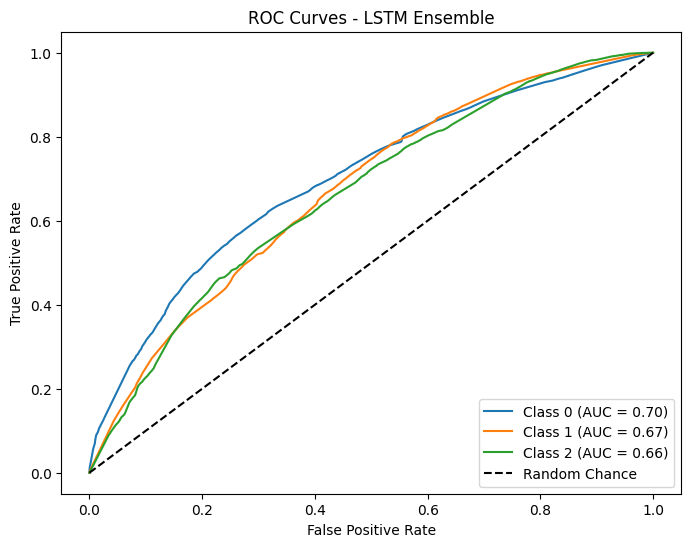

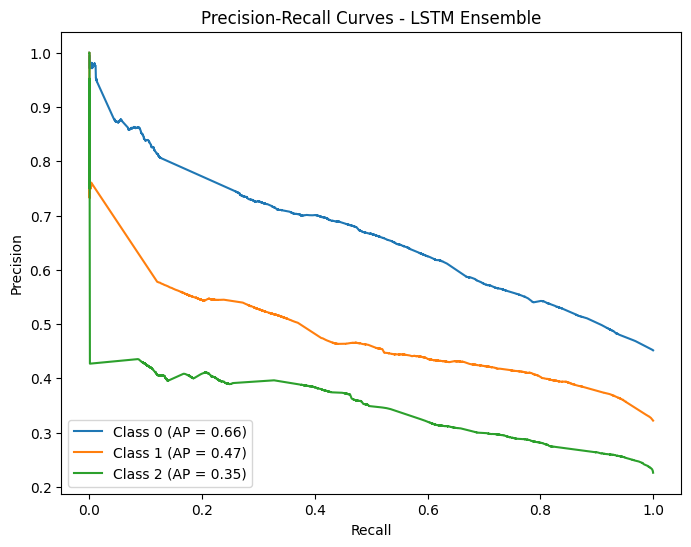

In [22]:
# ROC Curve 그리기
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f"Class {i} (AUC = {roc_auc[i]:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Chance")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves - LSTM Ensemble")
plt.legend(loc="lower right")
plt.show()

# Precision-Recall Curve 그리기
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(recall[i], precision[i], label=f"Class {i} (AP = {avg_precision[i]:.2f})")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curves - LSTM Ensemble")
plt.legend(loc="lower left")
plt.show()

In [23]:
# Accuracy 및 Error Rate 계산
accuracy = np.sum(Y_test.values == ensemble_lstm_preds) / len(Y_test.values)
error_rate = 1 - accuracy

print(f"Test Accuracy: {accuracy:.4f}")
print(f"Error Rate: {error_rate:.4f}")


Test Accuracy: 0.5075
Error Rate: 0.4925


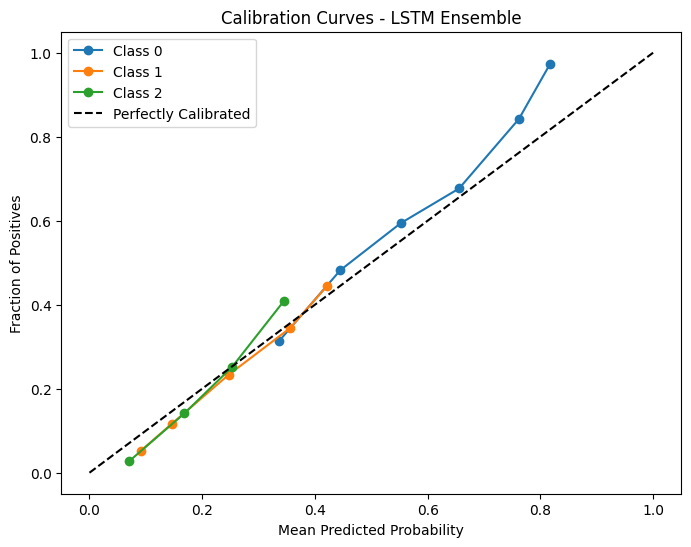

In [24]:
import matplotlib.pyplot as plt
from sklearn.calibration import calibration_curve

plt.figure(figsize=(8, 6))
for i in range(n_classes):
    fraction_of_positives, mean_predicted_value = calibration_curve(Y_test_bin[:, i], ensemble_lstm_probs[:, i], n_bins=10)
    plt.plot(mean_predicted_value, fraction_of_positives, marker='o', label=f"Class {i}")
plt.plot([0, 1], [0, 1], 'k--', label="Perfectly Calibrated")
plt.xlabel("Mean Predicted Probability")
plt.ylabel("Fraction of Positives")
plt.title("Calibration Curves - LSTM Ensemble")
plt.legend(loc="best")
plt.show()


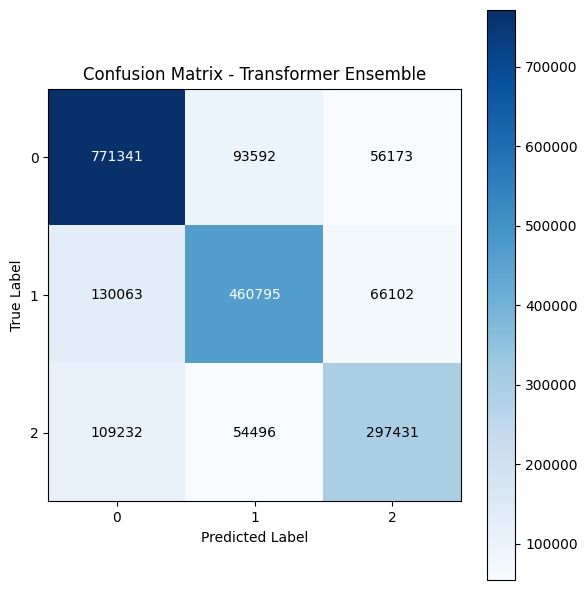

In [25]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

# 혼동 행렬 계산
cm_trans = confusion_matrix(Y_test.values, ensemble_transformer_preds)

plt.figure(figsize=(6, 6))
plt.imshow(cm_trans, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Transformer Ensemble")
plt.colorbar()
tick_marks = np.arange(num_classes)
plt.xticks(tick_marks, tick_marks)
plt.yticks(tick_marks, tick_marks)

# 셀 값 표시
fmt = 'd'
thresh = cm_trans.max() / 2.0
for i in range(cm_trans.shape[0]):
    for j in range(cm_trans.shape[1]):
        plt.text(j, i, format(cm_trans[i, j], fmt),
                 ha="center", va="center",
                 color="white" if cm_trans[i, j] > thresh else "black")

plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.tight_layout()
plt.show()


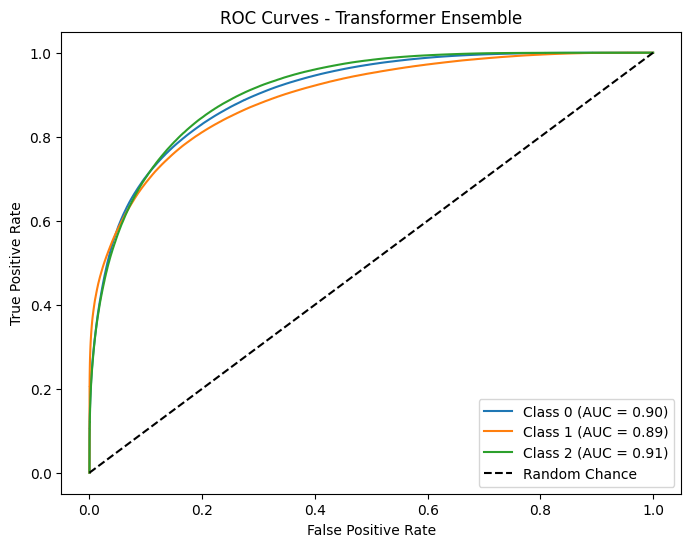

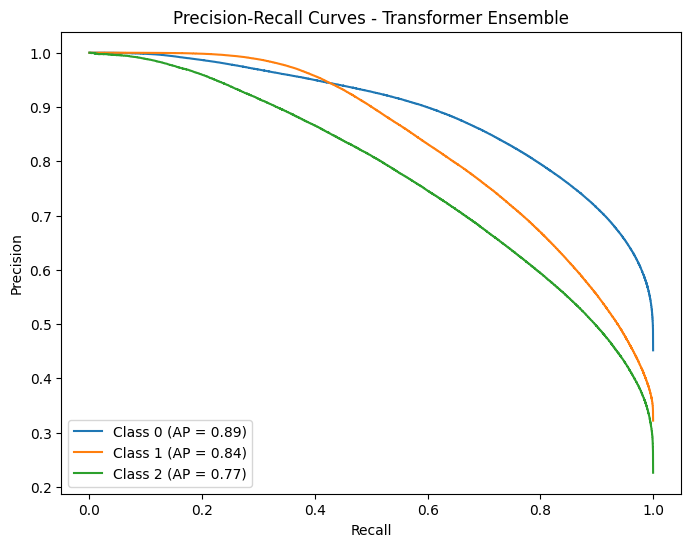

In [26]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
from sklearn.preprocessing import label_binarize

# 다중 클래스의 경우 True 라벨을 바이너리화
classes = np.unique(Y_test.values)
n_classes = len(classes)
Y_test_bin = label_binarize(Y_test.values, classes=classes)

fpr_trans = dict()
tpr_trans = dict()
roc_auc_trans = dict()
precision_trans = dict()
recall_trans = dict()
avg_precision_trans = dict()

for i in range(n_classes):
    fpr_trans[i], tpr_trans[i], _ = roc_curve(Y_test_bin[:, i], ensemble_transformer_probs[:, i])
    roc_auc_trans[i] = auc(fpr_trans[i], tpr_trans[i])
    precision_trans[i], recall_trans[i], _ = precision_recall_curve(Y_test_bin[:, i], ensemble_transformer_probs[:, i])
    avg_precision_trans[i] = average_precision_score(Y_test_bin[:, i], ensemble_transformer_probs[:, i])

# ROC Curve 그리기
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr_trans[i], tpr_trans[i], label=f"Class {i} (AUC = {roc_auc_trans[i]:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Chance")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves - Transformer Ensemble")
plt.legend(loc="lower right")
plt.show()

# Precision-Recall Curve 그리기
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(recall_trans[i], precision_trans[i], label=f"Class {i} (AP = {avg_precision_trans[i]:.2f})")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curves - Transformer Ensemble")
plt.legend(loc="lower left")
plt.show()


In [27]:
# Accuracy 및 Error Rate 계산
accuracy_trans = np.sum(Y_test.values == ensemble_transformer_preds) / len(Y_test.values)
error_rate_trans = 1 - accuracy_trans

print(f"Transformer Test Accuracy: {accuracy_trans:.4f}")
print(f"Transformer Error Rate: {error_rate_trans:.4f}")


Transformer Test Accuracy: 0.7501
Transformer Error Rate: 0.2499


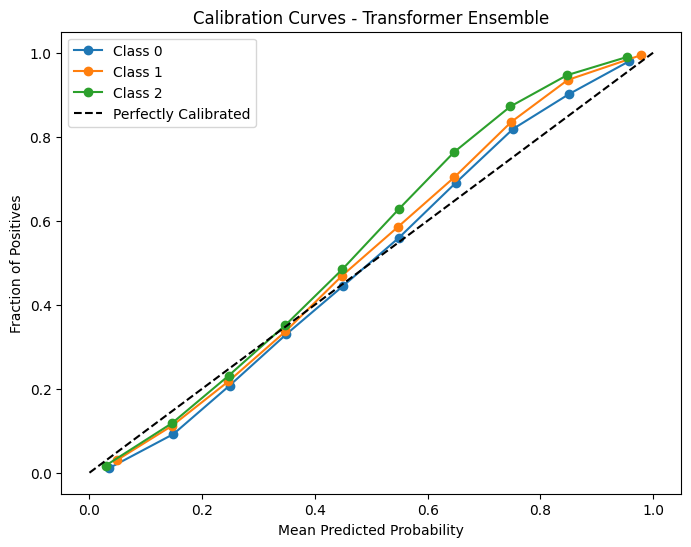

In [28]:
import matplotlib.pyplot as plt
from sklearn.calibration import calibration_curve

plt.figure(figsize=(8, 6))
for i in range(n_classes):
    fraction_of_positives, mean_predicted_value = calibration_curve(Y_test_bin[:, i], ensemble_transformer_probs[:, i], n_bins=10)
    plt.plot(mean_predicted_value, fraction_of_positives, marker='o', label=f"Class {i}")
plt.plot([0, 1], [0, 1], 'k--', label="Perfectly Calibrated")
plt.xlabel("Mean Predicted Probability")
plt.ylabel("Fraction of Positives")
plt.title("Calibration Curves - Transformer Ensemble")
plt.legend(loc="best")
plt.show()
